In [1]:
# Neural network with Keras Sequential API on Iris Dataset
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
from sklearn import datasets
from sklearn.model_selection import train_test_split
from keras.layers import Input, Dense
from keras.models import Model

# loading and splitting the data
iris = datasets.load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=0)
 
# 1 hot encoding
y_train_one_hot = np_utils.to_categorical(y_train)
y_test_one_hot = np_utils.to_categorical(y_test)

# print(y_one_hot)

#  instantaiting the model
model = Sequential()
# input layer
model.add(Dense(16, input_shape=(4,)))
model.add(Activation('sigmoid'))
# output layer - has 3 in output space
model.add(Dense(3))
model.add(Activation('softmax'))
# defining cost function
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=["accuracy"])
# training the model
model.fit(X_train, y_train_one_hot, epochs=100, batch_size=1, verbose=0);
loss, accuracy = model.evaluate(X_test, y_test_one_hot, verbose=0)
print("Accuracy = {:.2f}".format(accuracy))

Using TensorFlow backend.
/Users/zainraza/Downloads/dev/courses/DS/DS-2.2-Deep-Learning/env/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/zainraza/Downloads/dev/courses/DS/DS-2.2-Deep-Learning/env/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/zainraza/Downloads/dev/courses/DS/DS-2.2-Deep-Learning/env/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Accuracy = 0.98


In [2]:
# Functional Implementation
from keras.layers import Input, Dense
from keras.models import Model

inputs = Input(shape=(4,))

x = Dense(16, activation='sigmoid')(inputs)
predictions = Dense(3, activation='softmax')(x)

model = Model(inputs=inputs, outputs=predictions)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=["accuracy"])
model.fit(X_train, y_train_one_hot, epochs=100, batch_size=1, verbose=0);
loss, accuracy = model.evaluate(X_test, y_test_one_hot, verbose=0)
print("Accuracy = {:.2f}".format(accuracy))

Accuracy = 0.98


[100]
(105, 4)
[0.6000000052981906]


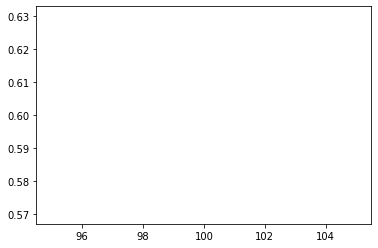

In [26]:
import matplotlib.pyplot as plt



accuracies = list()
batch_sizes = [100]
print(batch_sizes)
for i in batch_sizes:
    #  instantaiting the model
    model2 = Sequential()
    # input layer
    model2.add(Dense(16, input_shape=(4,)))
    model2.add(Activation('sigmoid'))
    # output layer - has 3 in output space
    model2.add(Dense(3))
    model2.add(Activation('softmax'))
    # defining cost function
    model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=["accuracy"])
    model2.fit(X_train, y_train_one_hot, epochs=100, batch_size=i, verbose=0, validation_data=(X_test, y_test_one_hot))
    loss, accuracy = model2.evaluate(X_test, y_test_one_hot, verbose=0)
    accuracies.append(accuracy)

print(X_train.shape)
print(accuracies)
plt.plot(batch_sizes, accuracies)